## Overview

EnergiSmart menghadirkan tantangan nyata dalam upaya membangun kota cerdas (Smart City) yang berkelanjutan. Dataset ini merekam kondisi iklim kota L setiap jam—meliputi temperatur udara, tekanan atmosfer, kecepatan angin, serta dua variabel cuaca tambahan dan mengaitkannya dengan konsumsi listrik pada waktu yang sama. Setiap baris data merepresentasikan satu jam pengamatan.

Mengapa penting?
- Optimasi jaringan listrik – Dengan memahami pola hubungan cuaca dan konsumsi, operator dapat menyiapkan cadangan energi, mengurangi pemadaman, dan mengintegrasikan sumber terbarukan.
- Perencanaan kota adaptif – Informasi tekanan, suhu ekstrem, dan kecepatan angin membantu pemerintah merancang kebijakan efisiensi energi, sistem pendinginan perkotaan, hingga skema tarif dinamis.
- Kesadaran lingkungan – Prediksi yang akurat membuka peluang kampanye penghematan energi berbasis data, mendorong warga menurunkan jejak karbon.

Tujuan: Pemahaman dan penyelesaian hasil prediksi secara lengkap dari awal sampai akhir

### 1. Data Understanding
#### Columns
- ID: Kolom penanda unik untuk setiap observasi dalam dataset (berupa angka urut).
- tanggal_waktu: Kolom yang berisi tanggal dan waktu dalam format YYYY-MM-DD HH:MM:SS.
- suhu: Suhu udara saat pencatatan (dalam satuan derajat Celcius).
- beban_listrik: Nilai beban listrik pada waktu tertentu (dalam satuan MW), yang mewakili beban sistem distribusi pada generator pembangkit.
- kecepatan_angin: Kecepatan angin pada saat observasi (meter/menit).
- tekanan_udara: Tekanan atmosfer (dalam satuan hPa).
- dampak_lingkungan: Kategori kondisi lingkungan terhadap konsumsi energi:
    - A: Rendah – kondisi lingkungan dalam kondisi stabil.
    - B: Moderat – kondisi lingkungan mengalami perubahan.
    - C: Tinggi – kondisi lingkungan berisiko tinggi (cuaca buruk).
- konsumsi_listrik: Jumlah energi listrik yang digunakan setiap jam (dalam satuan MW), yang berfungsi sebagai variabel target. Namun, terkadang hasil pengukuran dapat mengalami gangguan atau kesalahan akibat faktor teknis

#### Files
- train.csv - Dataset yang digunakan untuk melatih model machine learning
- test.csv - Dataset yang digunakan untuk memprediksi dari hasil pelatihan
- sample_submission.csv - Format pengumpulan hasil prediksi


In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
# Buat data_train dan data_test dalam bentuk dataframe
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

In [56]:
# Tampilkan Data Train dan Data Test
print("Data Train - Head")
display(df_train.head())

print("Data Train - Tail")
display(df_train.tail())

# Tampilkan Data Test
print("Data Test - Head")
display(df_test.head())

print("Data Test - Tail")
display(df_test.tail())


Data Train - Head


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,A,216.0
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,A,210.0
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,A,225.0
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,A,216.0
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,A,222.0


Data Train - Tail


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik
24331,32179,2025-05-19 19:00:00,27.8,10.7,4.505,981.0,A,186.0
24332,32180,2025-05-19 20:00:00,27.8,7.9,4.005,976.0,A,198.0
24333,32181,2025-05-19 21:00:00,27.8,10.0,5.920,989.0,A,192.0
24334,32182,2025-05-19 22:00:00,27.0,9.3,3.040,982.0,A,183.0
24335,32183,2025-05-19 23:00:00,27.4,10.0,4.205,979.0,A,192.0


Data Test - Head


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan
0,32184,2025-05-20 00:00:00,27.8,7.1,2.075,980.0,A
1,32185,2025-05-20 01:00:00,26.2,7.1,5.005,988.0,A
2,32186,2025-05-20 02:00:00,27.4,6.4,7.385,990.0,A
3,32187,2025-05-20 03:00:00,26.6,9.3,1.890,973.0,A
4,32188,2025-05-20 04:00:00,26.2,9.3,2.540,989.0,A


Data Test - Tail


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan
2155,34891,2025-09-09 19:00:00,21.8,-15.0,51.685,1009.0,A
2156,34892,2025-09-09 20:00:00,20.6,-11.4,56.105,1005.0,A
2157,34893,2025-09-09 21:00:00,21.4,-12.9,61.275,995.0,A
2158,34894,2025-09-09 22:00:00,20.6,-11.4,67.210,996.0,A
2159,34895,2025-09-09 23:00:00,21.1,-11.4,71.880,1009.0,A


In [57]:
#Deskripsikan tipe data dari tiap-tiap kolom
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 24336 non-null  int64  
 1   tanggal_waktu      24336 non-null  object 
 2   suhu               24336 non-null  float64
 3   beban_listrik      24336 non-null  float64
 4   kecepatan_angin    24336 non-null  float64
 5   tekanan_udara      24336 non-null  float64
 6   dampak_lingkungan  24336 non-null  object 
 7   konsumsi_listrik   24283 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB


In [58]:
#Wawasan perhitungan matematis
display(df_train.describe())
#Bentuk Data (Baris, Kolom)
display(df_train.shape)

,ID,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik
count,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24283.000000
mean,16027.381657,25.161082,-1.783510,23.631823,986.012964,532.445209
std,9299.957517,4.888658,10.521302,46.781818,12.130831,4826.021227
min,0.000000,12.700000,-32.900000,1.075000,953.000000,174.000000
25%,8051.750000,21.100000,-10.700000,3.165000,977.000000,219.000000
50%,16079.500000,25.800000,-1.400000,6.670000,986.000000,270.000000
75%,24155.250000,29.400000,7.900000,22.700000,995.000000,342.000000
max,32183.000000,35.300000,18.600000,586.600000,1024.000000,99999.000000


(24336, 8)

### 2. Data Preprocessing
- Konversi Kolom Waktu
- Feature Engineering
- Handling Missing Values
- Data Outlier
- Encoding Data

In [27]:
# 1. Konversi Kolom Waktu
# Ubah kolom tanggal_waktu pada df_train dan df_test dalam format datetime
df_train['tanggal_waktu'] = pd.to_datetime(df_train['tanggal_waktu'])
df_test['tanggal_waktu'] = pd.to_datetime(df_train['tanggal_waktu'])

# Lihat tipe data kolom tanggal_waktu
tipe_waktu = pd.DataFrame({
    'DataFrame': ['df_train', 'df_test'],
    'Tipe Data': [df_train['tanggal_waktu'].dtype, df_test['tanggal_waktu'].dtype]
})
display(tipe_waktu)


,DataFrame,Tipe Data
0,df_train,datetime64[ns]
1,df_test,datetime64[ns]


In [28]:
# 2. Feature Engineering
# Buat kolom baru: tahun, bulan, tanggal, waktu, dan tetap pertahankan tanggal_waktu
df_train['tahun'] = df_train['tanggal_waktu'].dt.year
df_train['bulan'] = df_train['tanggal_waktu'].dt.month
df_train['tanggal'] = df_train['tanggal_waktu'].dt.day
df_train['waktu'] = df_train['tanggal_waktu'].dt.time

df_test['tahun'] = df_test['tanggal_waktu'].dt.year
df_test['bulan'] = df_test['tanggal_waktu'].dt.month
df_test['tanggal'] = df_test['tanggal_waktu'].dt.day
df_test['waktu'] = df_test['tanggal_waktu'].dt.time

#  Lihat hasil
display(df_train[['tanggal_waktu', 'tanggal', 'bulan', 'tahun', 'waktu']].head())
display(df_test[['tanggal_waktu', 'tanggal', 'bulan', 'tahun', 'waktu']].head())

,tanggal_waktu,tanggal,bulan,tahun,waktu
0,2021-09-17 00:00:00,17,9,2021,00:00:00
1,2021-09-17 01:00:00,17,9,2021,01:00:00
2,2021-09-17 02:00:00,17,9,2021,02:00:00
3,2021-09-17 03:00:00,17,9,2021,03:00:00
4,2021-09-17 04:00:00,17,9,2021,04:00:00


,tanggal_waktu,tanggal,bulan,tahun,waktu
0,2021-09-17 00:00:00,17,9,2021,00:00:00
1,2021-09-17 01:00:00,17,9,2021,01:00:00
2,2021-09-17 02:00:00,17,9,2021,02:00:00
3,2021-09-17 03:00:00,17,9,2021,03:00:00
4,2021-09-17 04:00:00,17,9,2021,04:00:00


In [29]:
# 3. Missing Value Handling
# a. Cek Missing Value pada kedua df
missing_train = df_train.isnull().sum().to_frame(name='Jumlah Missing')
missing_train['Persentase (%)'] = (missing_train['Jumlah Missing'] / len(df_test)) * 100
missing_train = missing_train[missing_train['Jumlah Missing'] > 0]

missing_test = df_test.isnull().sum().to_frame(name='Jumlah Missing')
missing_test['Persentase (%)'] = (missing_test['Jumlah Missing'] / len(df_test)) * 100
missing_test = missing_test[missing_test['Jumlah Missing'] > 0]

print("Missing Value pada Data Train")
display(missing_train.round(2))
print("Missing Value pada Data Test")
display(missing_test.round(2))

Missing Value pada Data Train


,Jumlah Missing,Persentase (%)
konsumsi_listrik,53,2.45


Missing Value pada Data Test


,Jumlah Missing,Persentase (%)


In [30]:
# b. Missing Value Handling
#Karena hanya 53 dari 24336 baris yang bernilai null, maka baris yang bernilai null akan di-drop karena tidak terlalu berpengaruh (hanya 0,2% saja).
df_train = df_train.dropna()
display(df_train.isnull().sum())
display(df_train.shape)

ID                   0
tanggal_waktu        0
suhu                 0
beban_listrik        0
kecepatan_angin      0
tekanan_udara        0
dampak_lingkungan    0
konsumsi_listrik     0
tahun                0
bulan                0
tanggal              0
waktu                0
dtype: int64

(24283, 12)

In [31]:
# 4. Deteksi Outlier
# a. Buat Fungsi untuk menghitung IQR dan outlier
def detect_outliers_iqr(df):
    outlier_summary = {}
    total_rows = len(df)

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        outlier_count = len(outliers)

        # Hanya simpan jika jumlah outlier > 0
        if outlier_count > 0:
            outlier_percentage = (outlier_count / total_rows) * 100
            outlier_summary[col] = {
                'Jumlah Outlier': outlier_count,
                'Persentase Outlier (%)': round(outlier_percentage, 2)
            }

    return pd.DataFrame.from_dict(outlier_summary, orient='index')

In [32]:
# b. Tampilkan tabel outlier per kolom
display(detect_outliers_iqr(df_train))
display(detect_outliers_iqr(df_test))

,Jumlah Outlier,Persentase Outlier (%)
kecepatan_angin,2669,10.99
tekanan_udara,3,0.01
konsumsi_listrik,1123,4.62


,Jumlah Outlier,Persentase Outlier (%)
kecepatan_angin,319,14.77
tekanan_udara,1,0.05
tahun,168,7.78
bulan,168,7.78


In [33]:
Q1 = df_train.select_dtypes(include=np.number).quantile(0.25)
Q3 = df_train.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR 
filter = (df_train.select_dtypes(include=np.number) >= lower_limit) & (df_train.select_dtypes(include=np.number) <= upper_limit)
df_train = df_train[filter.all(axis=1)]

In [34]:
display(detect_outliers_iqr(df_train))

,Jumlah Outlier,Persentase Outlier (%)
kecepatan_angin,1544,7.53
tekanan_udara,1,0.00
konsumsi_listrik,283,1.38


In [42]:
# 5. Cek data kategorikal dampak_lingkungan
# Mengecek nilai unik dan jumlahnya dari kolom 'dampak_lingkungan' serta memastikan apakah ada salah input
train_unik = df_train['dampak_lingkungan'].value_counts().reset_index()
train_unik.columns = ['Nilai Unik', 'Jumlah']
test_unik = df_test['dampak_lingkungan'].value_counts().reset_index()
test_unik.columns = ['Nilai Unik', 'Jumlah']

display(train_unik)
display(test_unik)

,Nilai Unik,Jumlah
0,A,23091
1,C,976
2,B,216


,Nilai Unik,Jumlah
0,A,2100
1,C,59
2,B,1


In [43]:
# 6. Encoding Data
#df_train = pd.get_dummies(df_train, columns=['dampak_lingkungan'])
#df_test = pd.get_dummies(df_test, columns=['dampak_lingkungan'])

In [44]:
# Lihat hasil Encoding
#display(df_train[['dampak_lingkungan_A', 'dampak_lingkungan_B', 'dampak_lingkungan_C']].head)
#display(df_test[['dampak_lingkungan_A', 'dampak_lingkungan_B', 'dampak_lingkungan_C']].head)

### 3. Exploratory Data Analysis
- Visualisasi Data Time Series
- Visualisasi Data Numeri
- Visualisasi Outlier

In [45]:
df_train['tanggal_waktu']

0       2021-09-17 00:00:00
1       2021-09-17 01:00:00
2       2021-09-17 02:00:00
3       2021-09-17 03:00:00
4       2021-09-17 04:00:00
                ...        
24331   2025-05-19 19:00:00
24332   2025-05-19 20:00:00
24333   2025-05-19 21:00:00
24334   2025-05-19 22:00:00
24335   2025-05-19 23:00:00
Name: tanggal_waktu, Length: 24283, dtype: datetime64[ns]

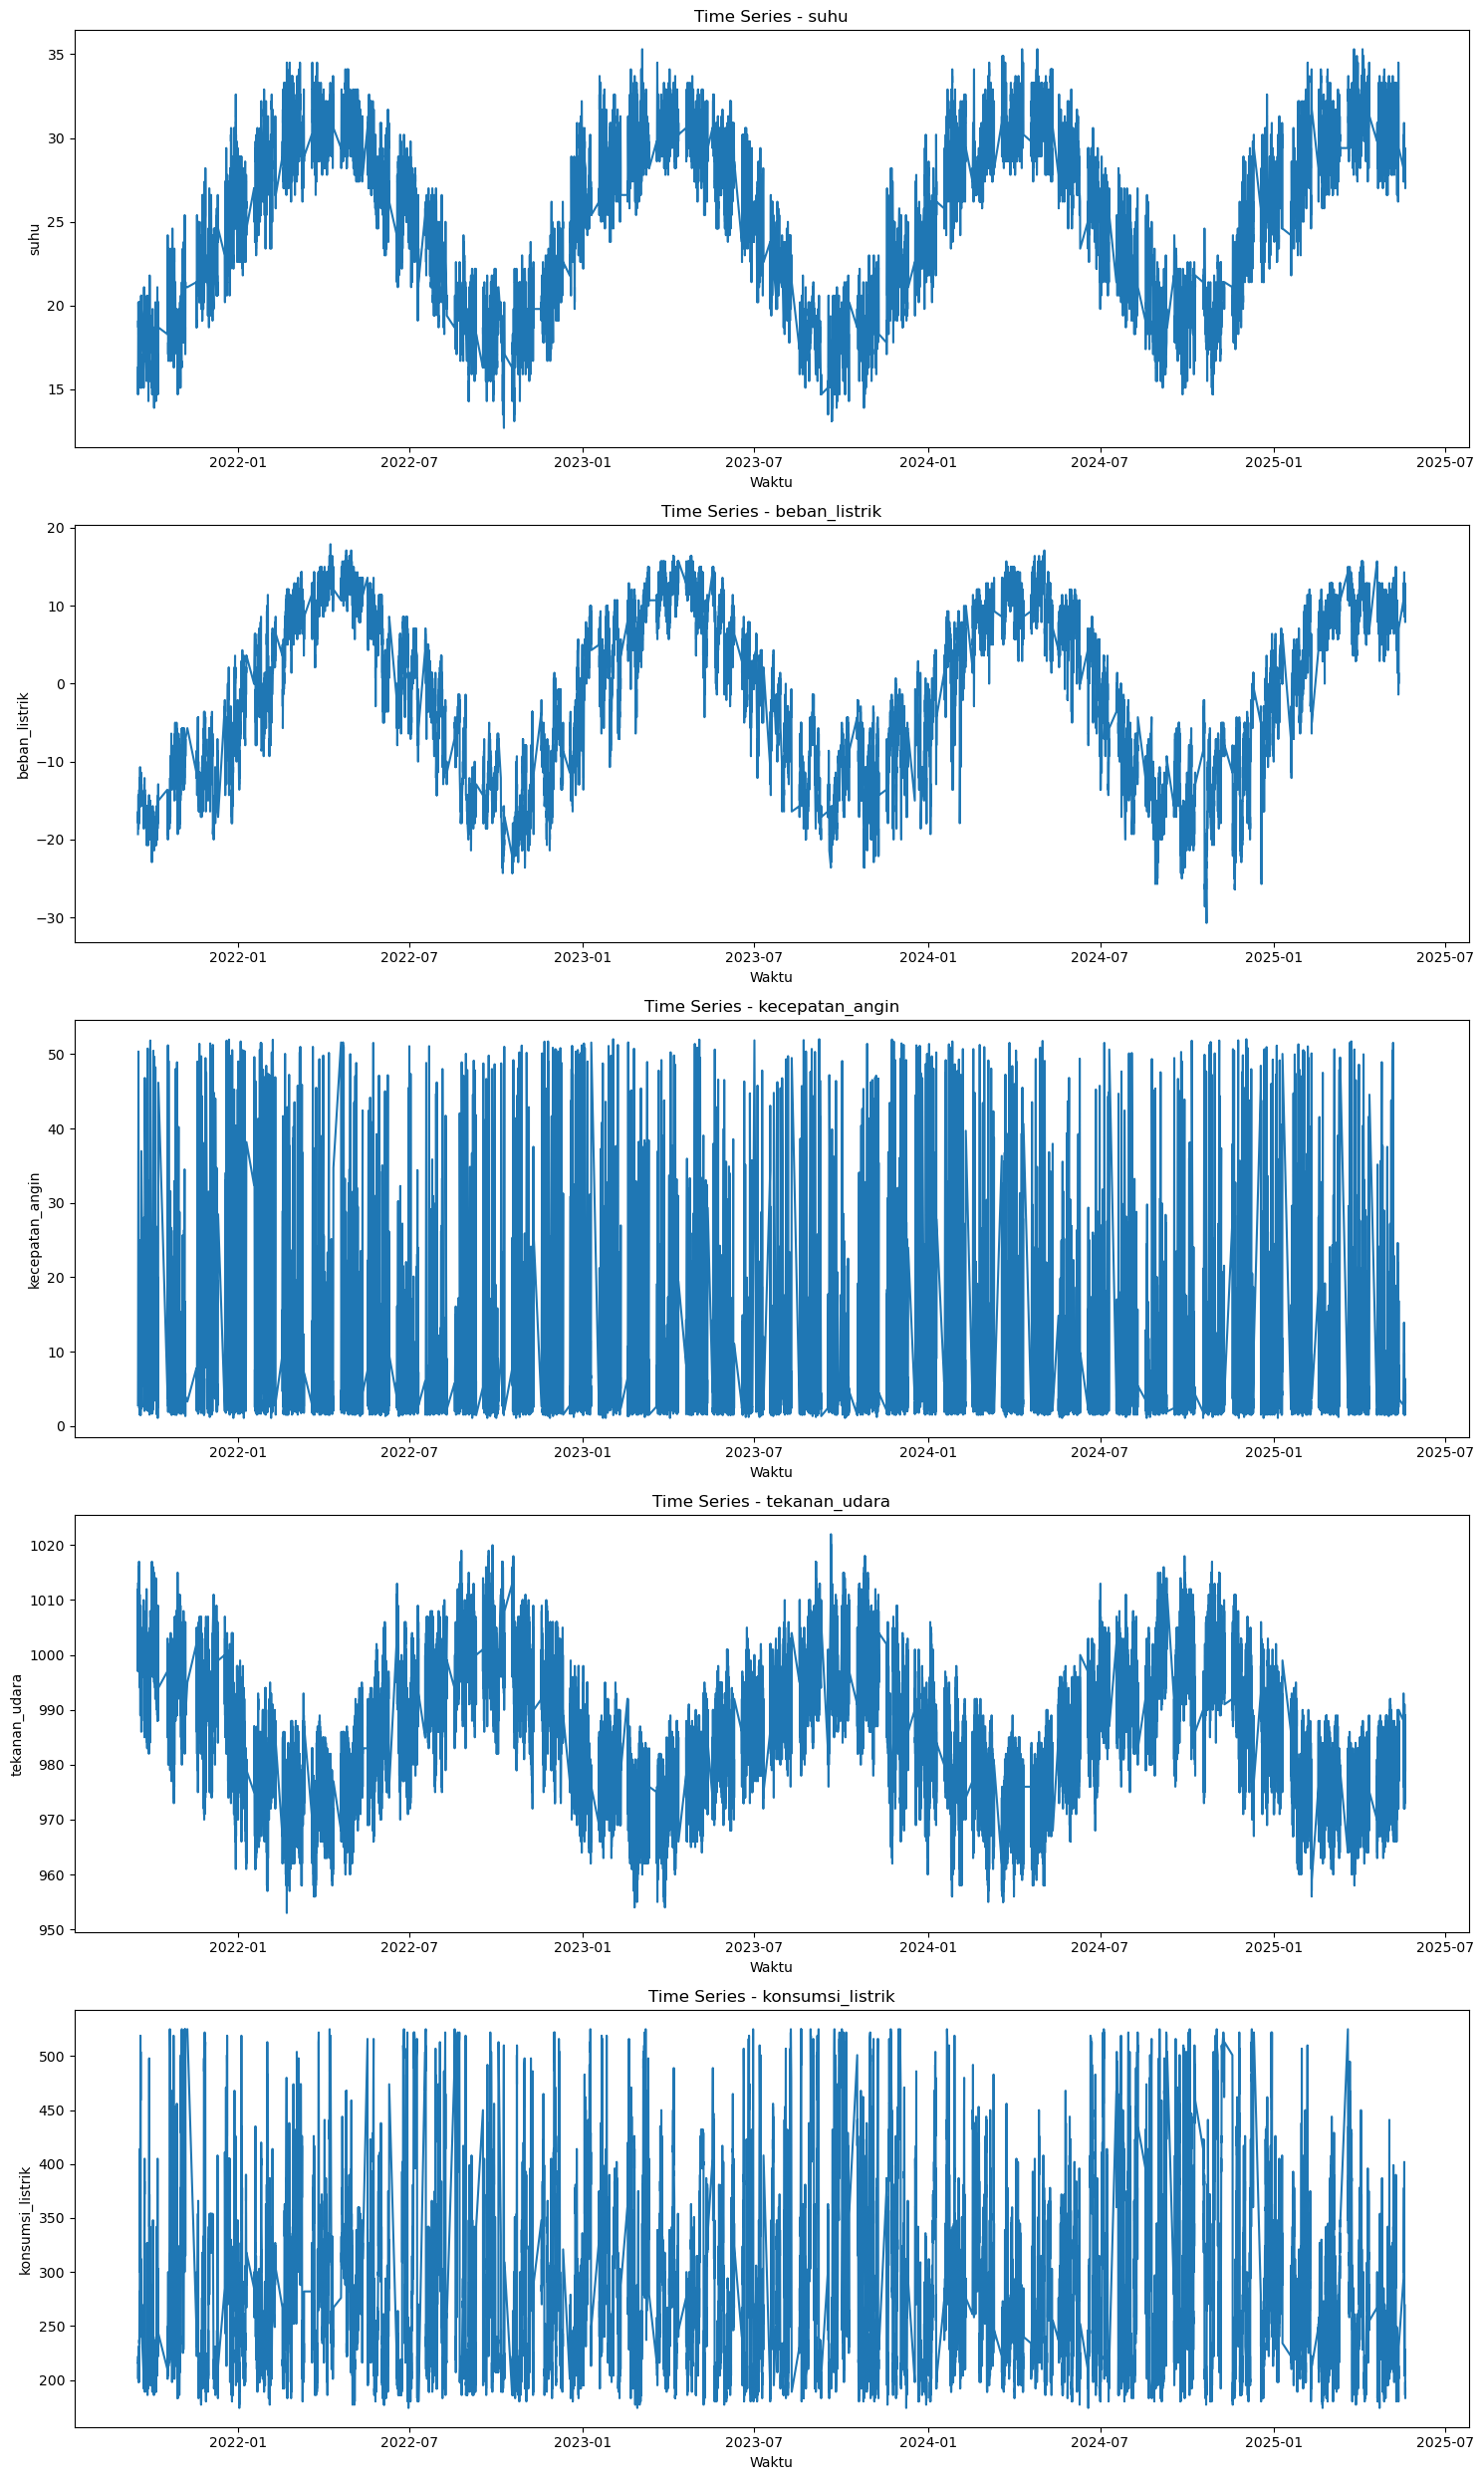

In [35]:
# 1. Visualisasi Data berdasarkan Time Series
num_cols = ['suhu', 'beban_listrik', 'kecepatan_angin', 'tekanan_udara', 'konsumsi_listrik']
plt.figure(figsize=(15, 25))
for i, kolom in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.lineplot(data=df_train, x='tanggal_waktu', y=kolom)
    plt.title(f'Time Series - {kolom}', fontsize=12)
    plt.xlabel('Waktu')
    plt.ylabel(kolom)
    plt.tight_layout()

plt.show()

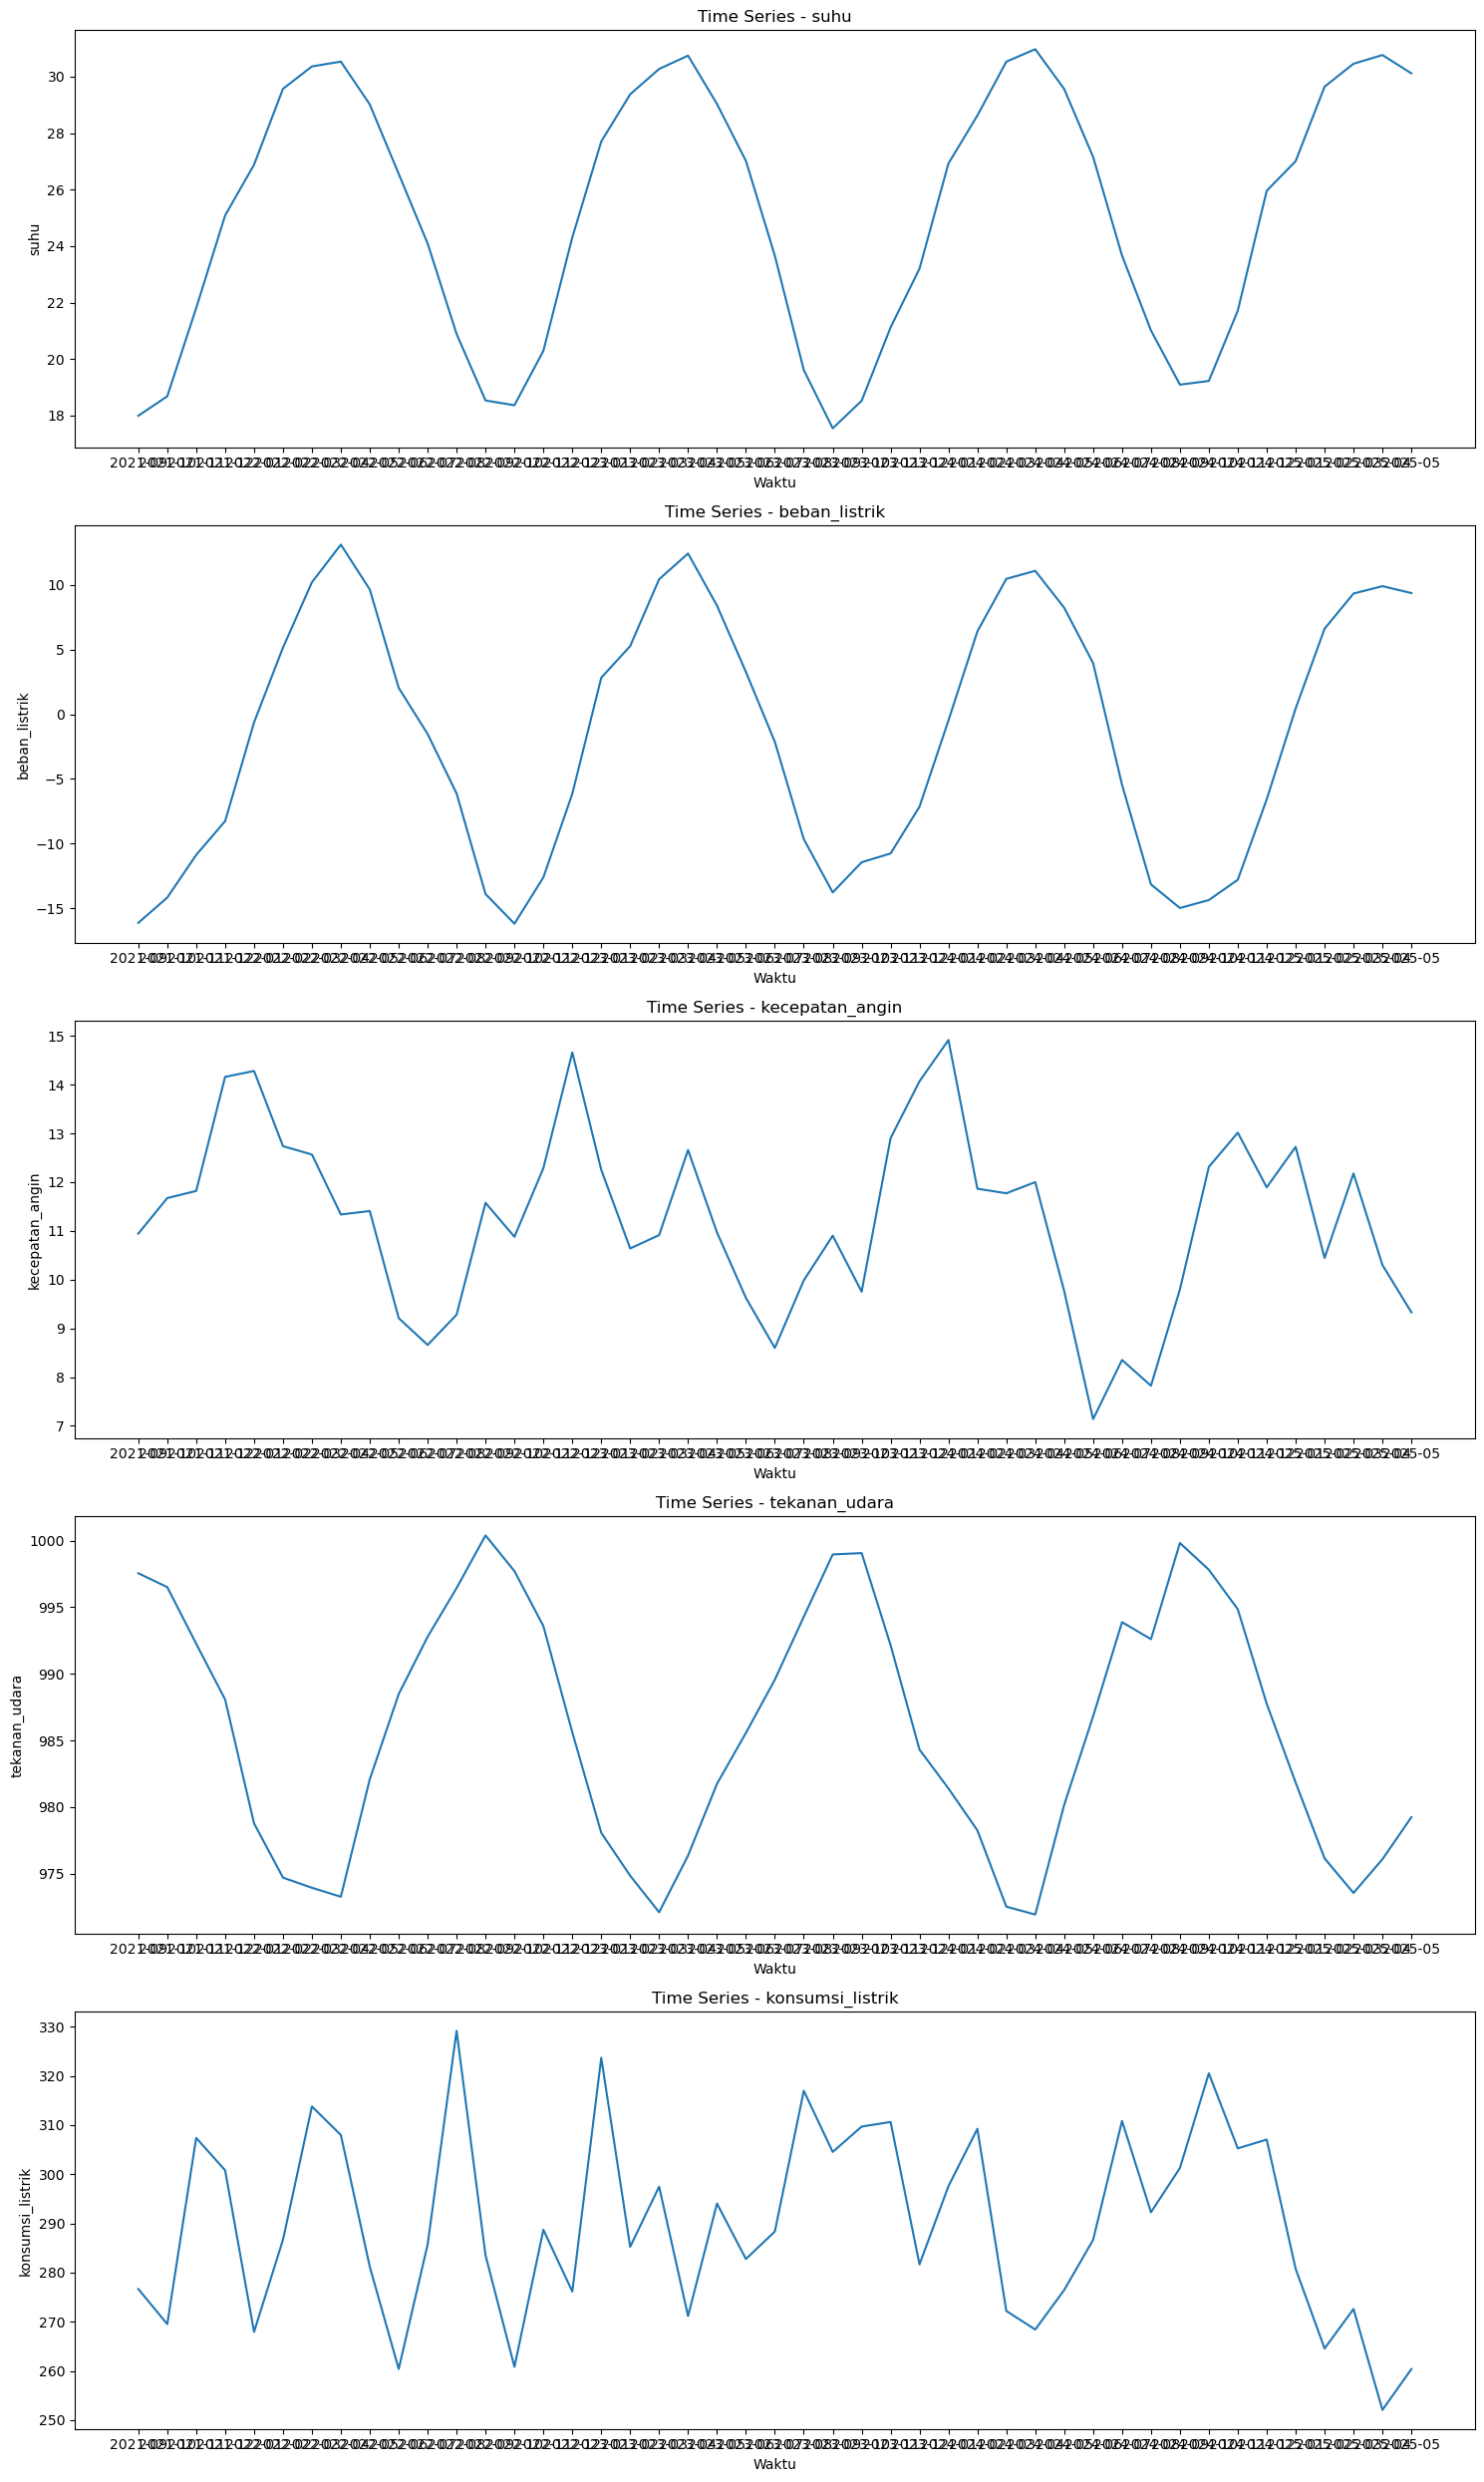

In [36]:
# Visualisasi dengan data yang diringkas berdasarkan tahun dan bulan
df_train['tahun_bulan'] = df_train['tanggal_waktu'].dt.to_period('M').astype(str)
df_train_ts_eda = df_train.groupby('tahun_bulan')[num_cols].mean().reset_index()

plt.figure(figsize=(15, 25))
for i, kolom in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.lineplot(data=df_train_ts_eda, x='tahun_bulan', y=kolom)
    plt.title(f'Time Series - {kolom}', fontsize=12)
    plt.xlabel('Waktu')
    plt.ylabel(kolom)
    plt.tight_layout()

plt.show()

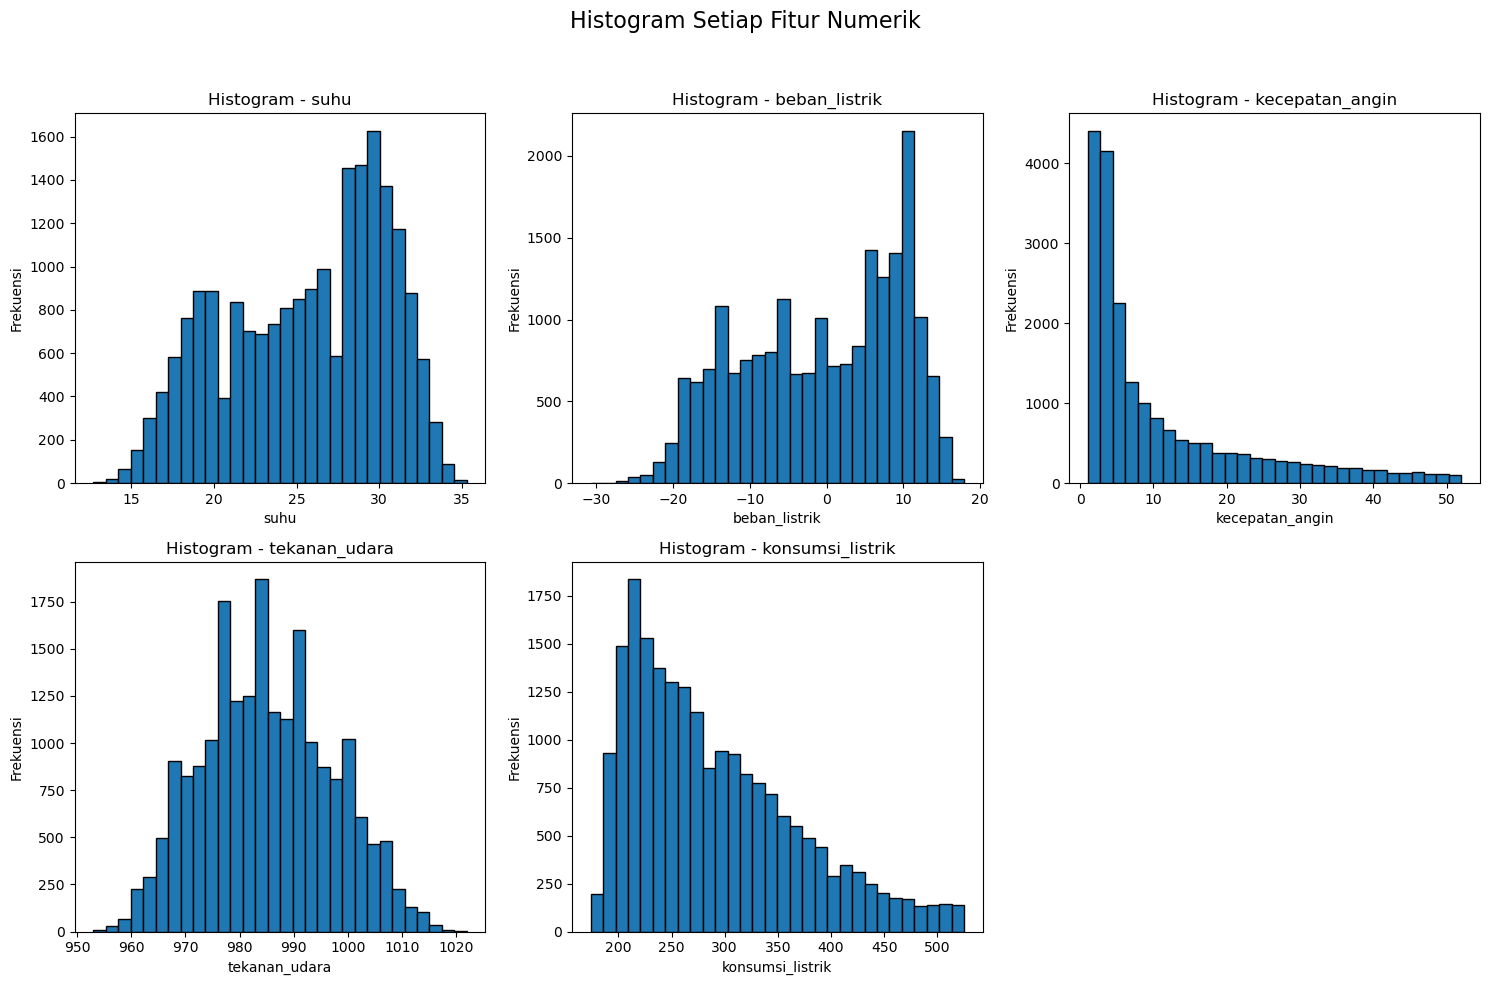

In [37]:
# 2. Visualisasi Histogram
plt.figure(figsize=(15, 10))
for i, kolom in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df_train[kolom], bins=30, edgecolor='black')
    plt.title(f"Histogram - {kolom}")
    plt.xlabel(kolom)
    plt.ylabel("Frekuensi")

plt.suptitle("Histogram Setiap Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

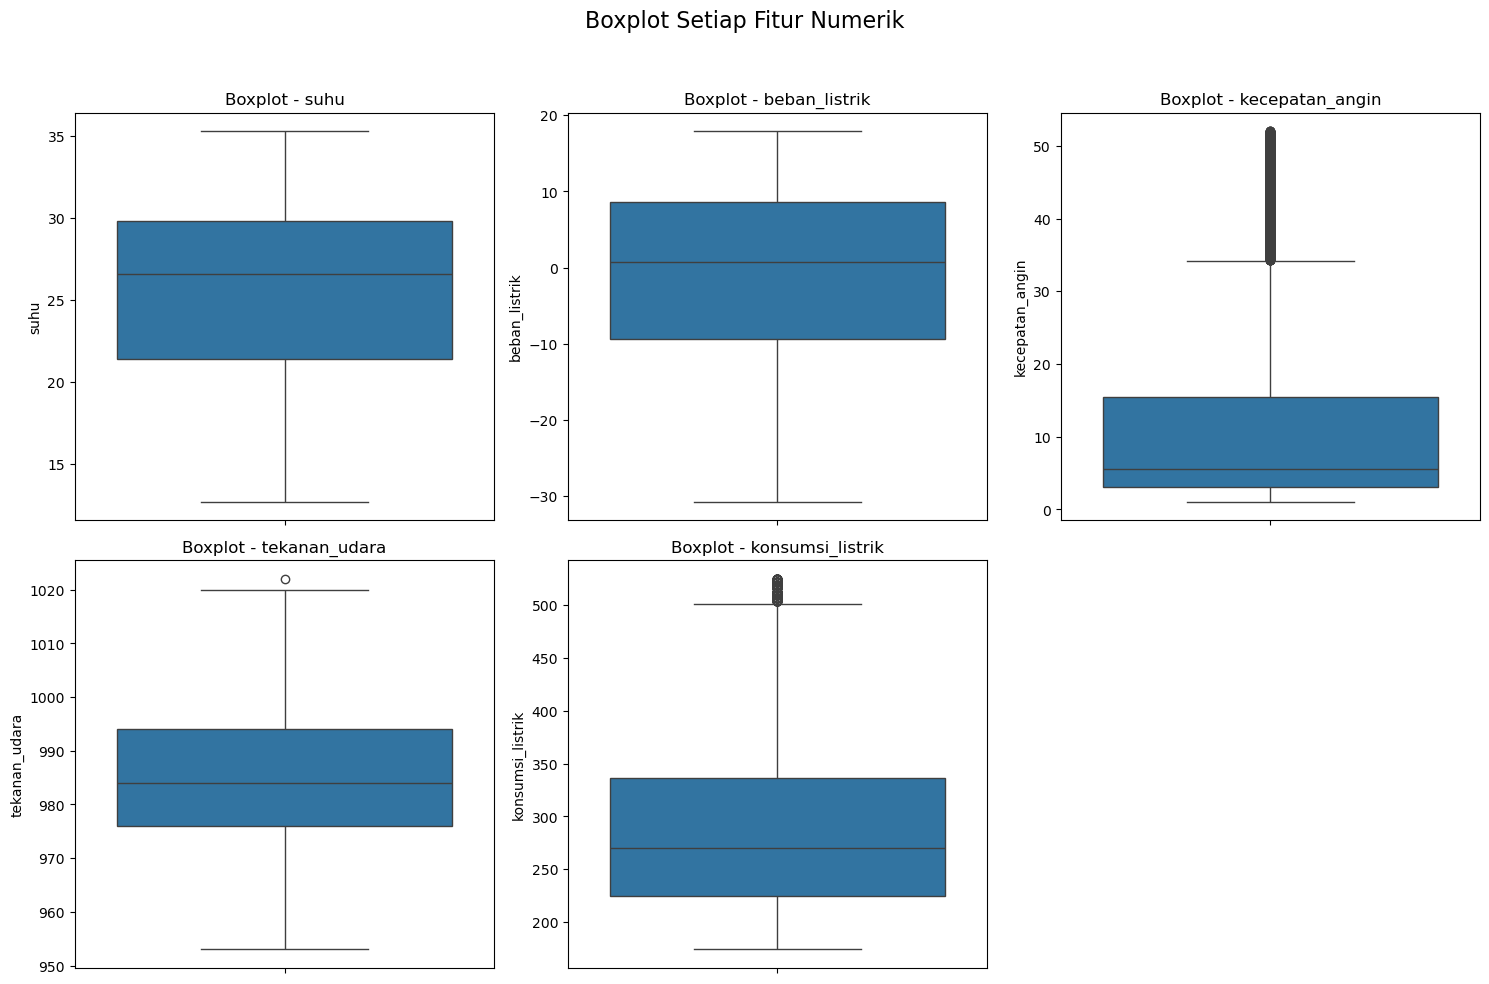

In [38]:
# 3. Visualisasi Boxplot
plt.figure(figsize=(15, 10))
for i, kolom in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Bikin grid 2x3
    sns.boxplot(y=df_train[kolom])
    plt.title(f"Boxplot - {kolom}")
    plt.xlabel("")  # Hapus label x karena sudah jelas dari judul
    plt.ylabel(kolom)

plt.suptitle("Boxplot Setiap Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

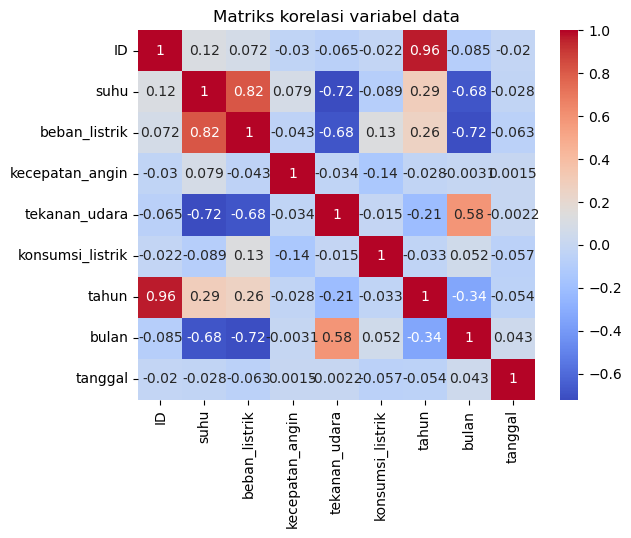

In [39]:
#Visualisasi Korelasi
correlation_matrix = df_train.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriks korelasi variabel data")
plt.show()

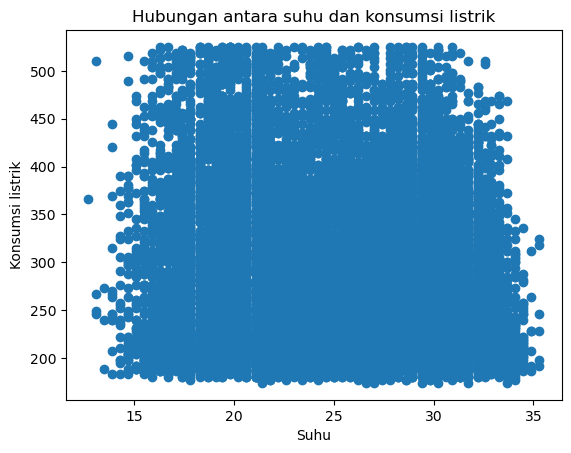

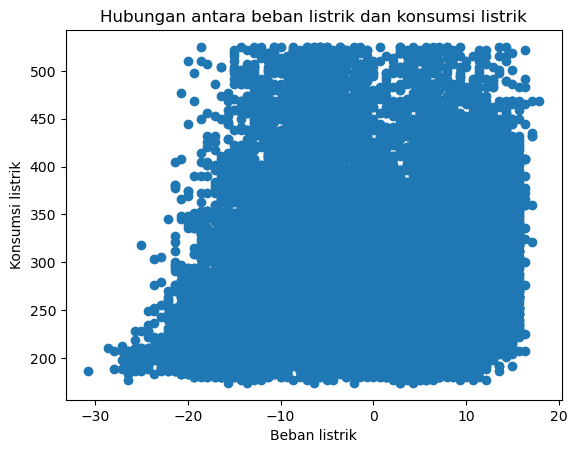

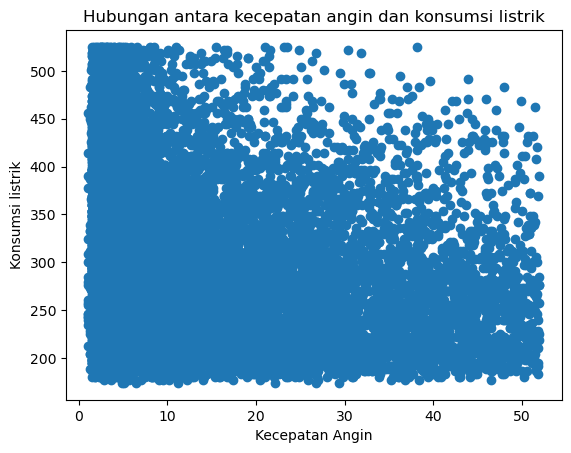

In [40]:
# Hubungan antara suhu dan konsumsi listrik
plt.scatter(df_train["suhu"], df_train["konsumsi_listrik"])
plt.title("Hubungan antara suhu dan konsumsi listrik")
plt.xlabel("Suhu")
plt.ylabel("Konsumsi listrik")
plt.show()

# Hubungan antara beban listrik dan konsumsi listrik
plt.scatter(df_train["beban_listrik"], df_train["konsumsi_listrik"])
plt.title("Hubungan antara beban listrik dan konsumsi listrik")
plt.xlabel("Beban listrik")
plt.ylabel("Konsumsi listrik")
plt.show()

# Hubungan antara kecepatan angin dan konsumsi listrik
plt.scatter(df_train["kecepatan_angin"], df_train["konsumsi_listrik"])
plt.title("Hubungan antara kecepatan angin dan konsumsi listrik")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Konsumsi listrik")
plt.show()

In [41]:
data_decomposition = df_train.copy()
data_decomposition = data_decomposition.set_index("tanggal_waktu")

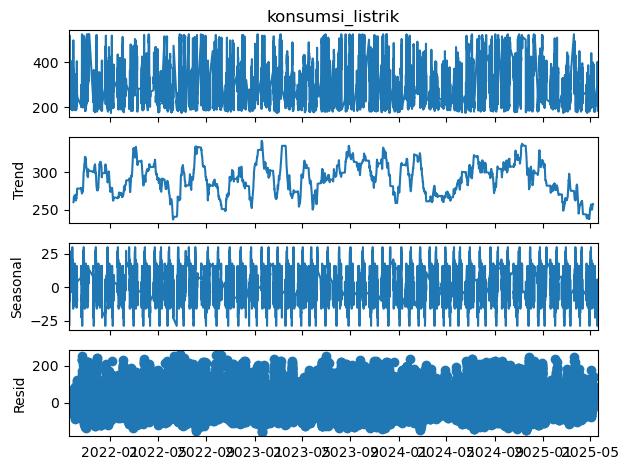

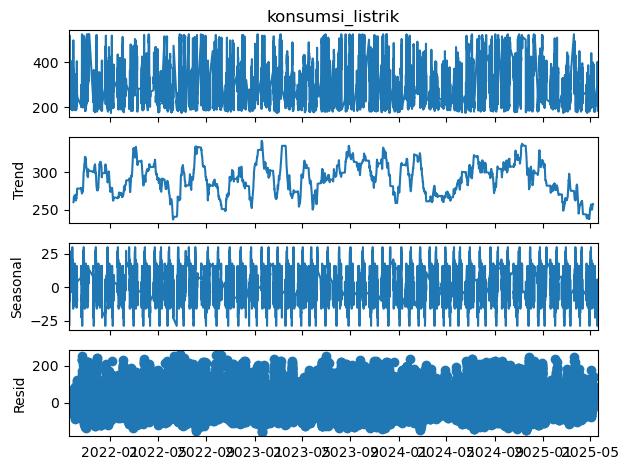

In [42]:
# Dekomposisi data additive

from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(data_decomposition['konsumsi_listrik'], model='additive', period=365)
additive_decomposition.plot()

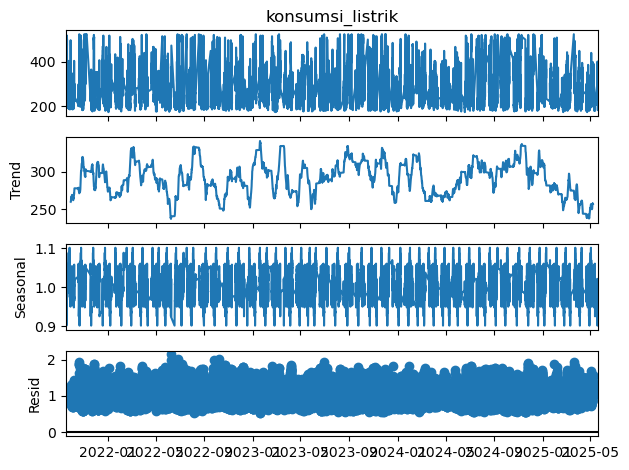

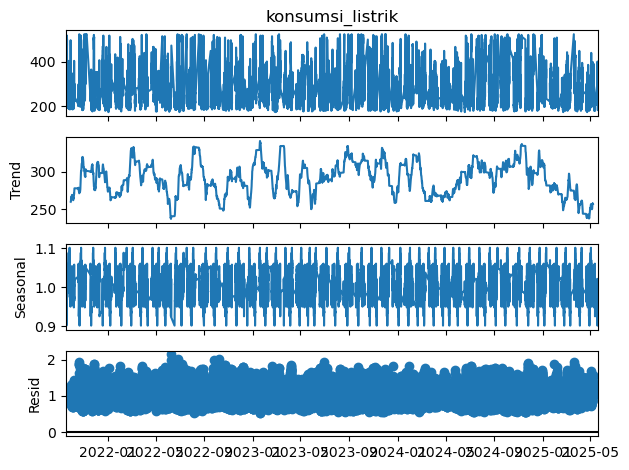

In [43]:
# Dekomposisi data multiplicative

multiplicative_decomposition = seasonal_decompose(data_decomposition['konsumsi_listrik'], model='multiplicative', period=365)
multiplicative_decomposition.plot()

In [44]:
train_size = int(len(df_train) * 0.8)
data_single = df_train[["konsumsi_listrik"]]
data_single_train, data_single_test = data_single[:train_size], data_single[train_size:]

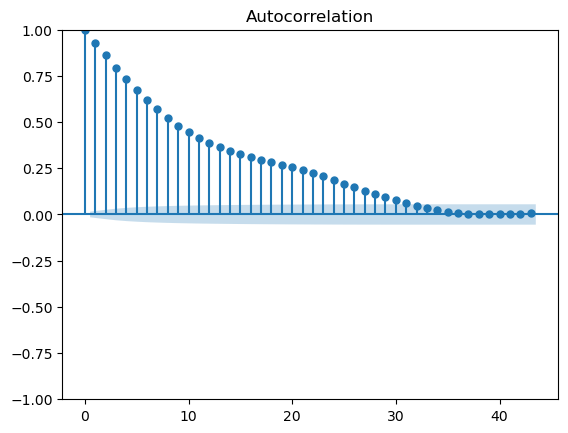

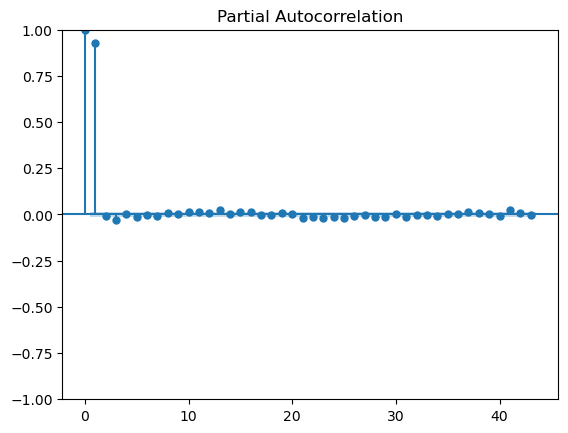

In [45]:
# Uji stationeritas
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(data_single_train.values)
pacf_original = plot_pacf(data_single_train.values)

In [46]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data):
    result = adfuller(data, autolag='AIC')
    print('ADF Test Statistic :' + str(result[0]))
    print('p-value :'+ str(result[1]))
    print('Number of lags :' + str(result[2]))
    print('Number of observations used :' + str(result[3]))
    print('Critical values :')
    for key, value in result[4].items():
        print('\t' + str(key) + ' : ' + str(value))

In [47]:
adfuller_test(data_single_test["konsumsi_listrik"])

ADF Test Statistic :-8.645972733427426
p-value :5.269720665949186e-14
Number of lags :17
Number of observations used :4082
Critical values :
	1% : -3.4319529928875574
	5% : -2.8622483144634048
	10% : -2.5671470426612117


## Memilih Model

In [56]:
# 1. SARIMAX
train_sarimax = df_train.copy()
target = 'konsumsi_listrik'
exog_vars = ['suhu', 'beban_listrik', 'kecepatan_angin', 'tekanan_udara', 'dampak_lingkungan']

In [57]:
# Split train-test, misal 80%-20%
split_idx = int(len(train_sarimax) * 0.8)
train = train_sarimax.iloc[:split_idx]
test = train_sarimax.iloc[split_idx:]

In [58]:
# Data untuk SARIMAX
endog_train = train[target]
exog_train = train[exog_vars]

endog_test = test[target]
exog_test = test[exog_vars]

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Contoh model comparison manual
results = []
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                model = SARIMAX(endog_train, exog=exog_train,
                                order=(p, d, q),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                result = model.fit(disp=False)
                results.append(((p,d,q), result.aic))
            except:
                continue

sorted(results, key=lambda x: x[1])


[]

In [60]:
# XGBoost
from xgboost import XGBRegressor

xgb_train = df_train.copy()
xgb_train = xgb_train.set_index('tanggal_waktu')

In [61]:
# Ekstrak fitur waktu
xgb_train['hour'] = xgb_train.index.hour
xgb_train['day'] = xgb_train.index.dayofweek
xgb_train['month'] = xgb_train.index.month

In [62]:
# Tambahkan lag dan rolling
xgb_train['konsumsi_listrik_lag1'] = xgb_train['konsumsi_listrik'].shift(1)
xgb_train['konsumsi_listrik_roll3'] = xgb_train['konsumsi_listrik'].rolling(3).mean()
